In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [26]:
df_index = pd.read_csv('intrest_rate.csv',sep=';')
df_index.head()

,lp,year,month,intrest_rate,uneployment_rate,index_price
0,1,2015,Jan,0.25,5.7,2050
1,2,2015,Feb,0.25,5.5,2070
2,3,2015,Mar,0.25,5.4,2085
3,4,2015,Apr,0.25,5.3,2100
4,5,2015,Mai,0.25,5.2,2120


In [27]:
df_index.drop(columns=['lp','year','month'],axis=1,inplace=True)

In [28]:
df_index.head()

,intrest_rate,uneployment_rate,index_price
0,0.25,5.7,2050
1,0.25,5.5,2070
2,0.25,5.4,2085
3,0.25,5.3,2100
4,0.25,5.2,2120


In [29]:
df_index.isnull().sum()

intrest_rate        0
uneployment_rate    0
index_price         0
dtype: int64

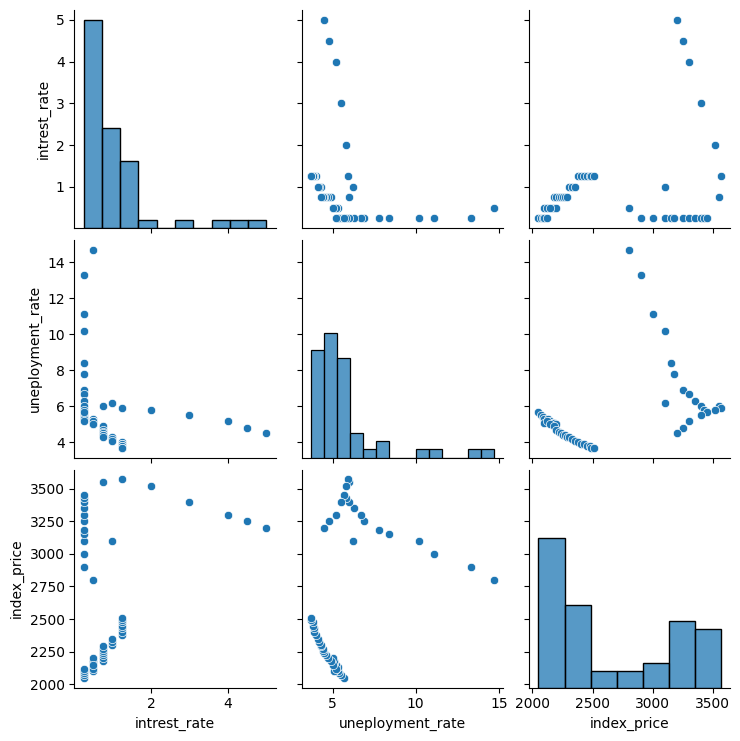

In [30]:
import seaborn as sns
sns.pairplot(df_index)

In [31]:
df_index.corr()

,intrest_rate,uneployment_rate,index_price
intrest_rate,1.000000,-0.268066,0.303146
uneployment_rate,-0.268066,1.000000,0.362796
index_price,0.303146,0.362796,1.000000


In [32]:
## visualization datapoints more closely

Text(0, 0.5, 'unemployment')

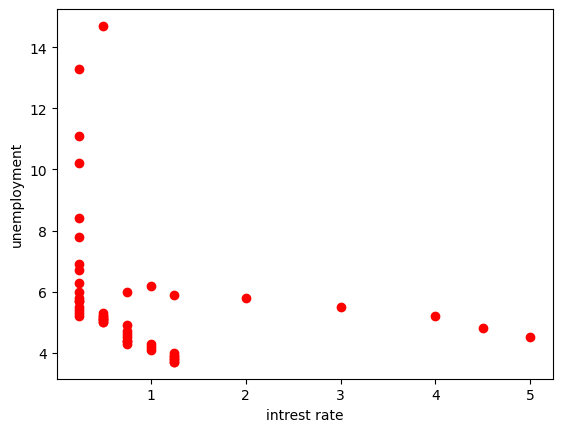

In [35]:
plt.scatter(df_index['intrest_rate'],df_index['uneployment_rate'],color='r')
plt.xlabel("intrest rate")
plt.ylabel("unemployment")

In [36]:
## independent and dependent features
x = df_index.iloc[::-1] 
y = df_index.iloc[:,-1] 

In [37]:
x.head()

,intrest_rate,uneployment_rate,index_price
49,5.0,4.5,3200
48,4.5,4.8,3250
47,4.0,5.2,3300
46,3.0,5.5,3400
45,2.0,5.8,3520


In [38]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

<Axes: xlabel='intrest_rate', ylabel='index_price'>

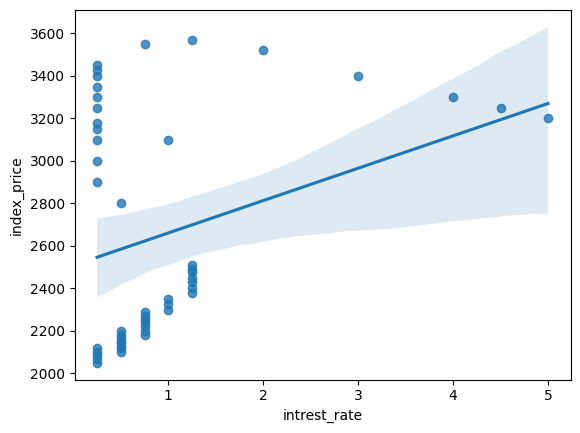

In [40]:
sns.regplot(x=df_index['intrest_rate'],y=df_index['index_price'])

<Axes: xlabel='intrest_rate', ylabel='uneployment_rate'>

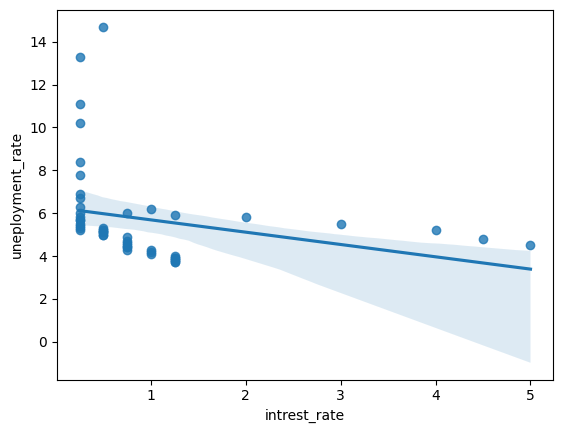

In [41]:
sns.regplot(x=df_index['intrest_rate'],y=df_index['uneployment_rate'])

In [42]:
from sklearn.preprocessing import StandardScaler